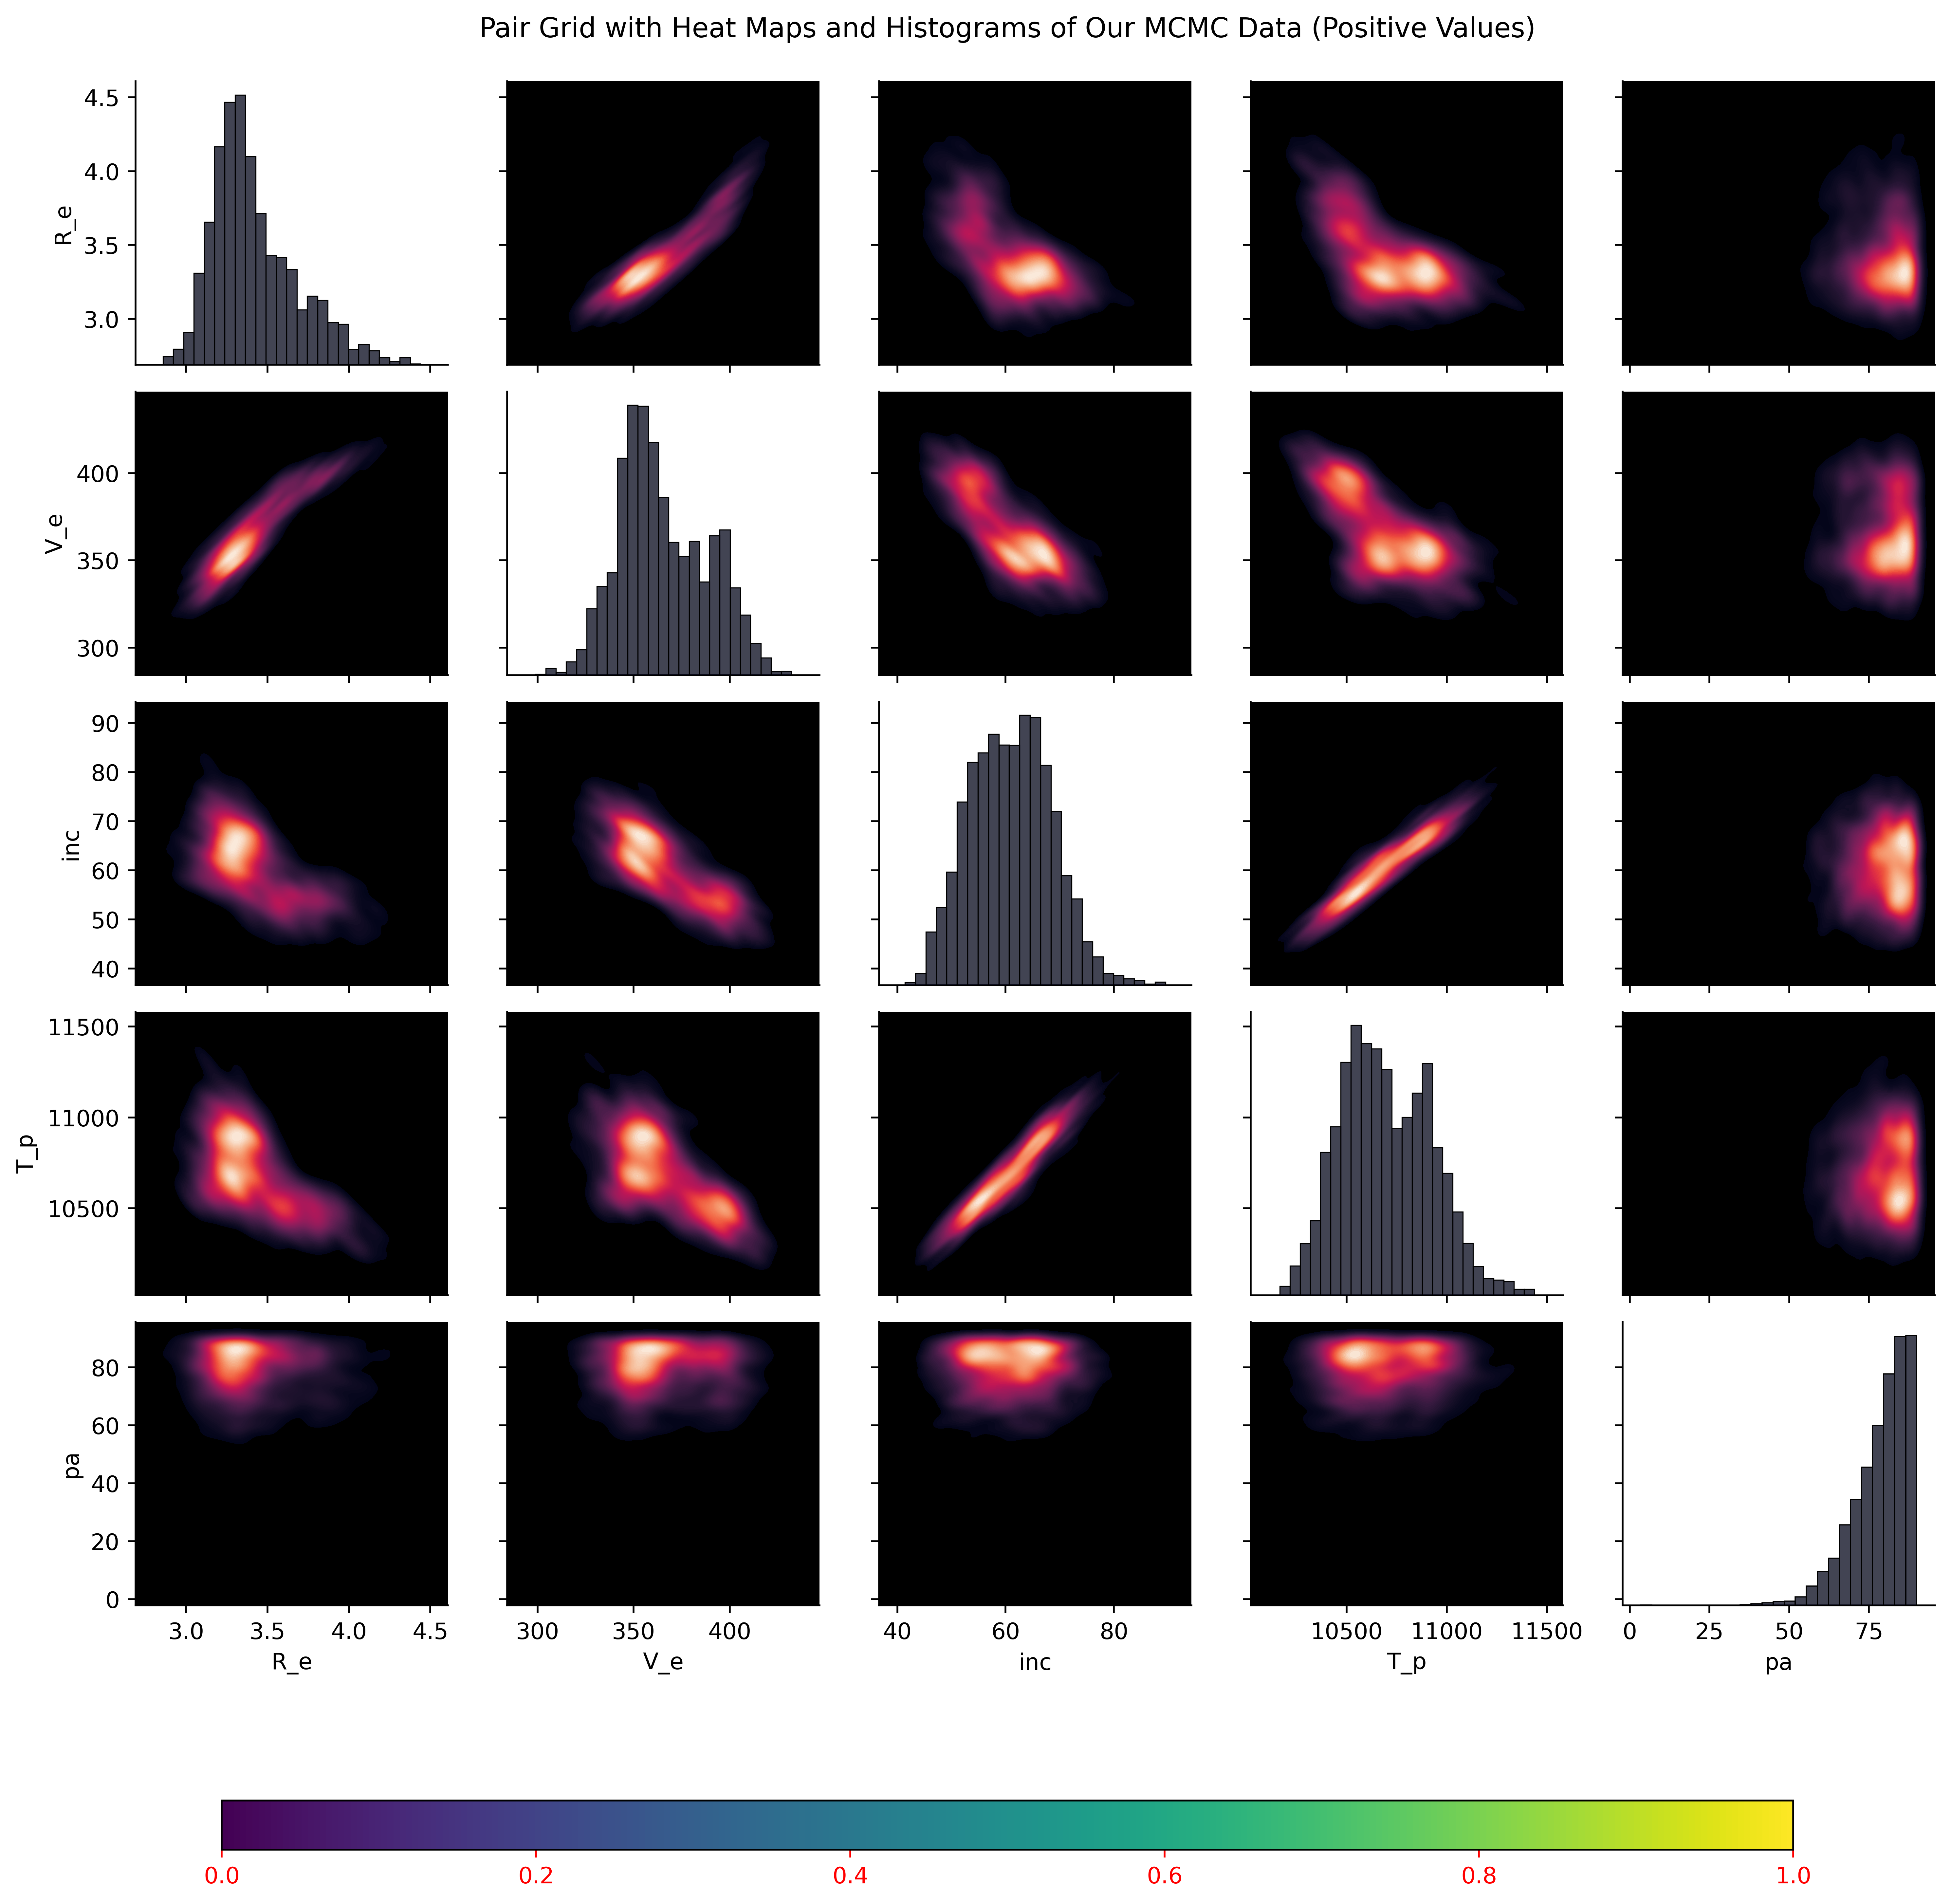

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read MCMC data from a .mcmc file. Remember that the file has a utf-8 encoding
def read_mcmc_data(file_path, encoding='utf-8'):
    data = pd.read_csv(file_path, delimiter='\t', encoding=encoding)  # Specify the encoding here
    return data

# Path to your .mcmc file
file_path = "/Users/john/Downloads/HD177724.mcmc"

# Read the MCMC data from the .mcmc file
try:
    mcmc_data = read_mcmc_data(file_path, encoding='utf-8')  # If utf-8 doesn't work, figure out what type of encoding your file has
except IOError:
    print("Error: File not found or could not be read.") # This is an error msg when the code cannot locate and read your .mcmc file
    exit(1)


# Create the pair grid with histograms and heat maps for positive values
g = sns.PairGrid(data=subset_data, diag_sharey=False)

# Map KDE plots in the upper and lower triangles with the 'rocket' color map
g.map_upper(sns.kdeplot, cmap='rocket', fill=True, levels=100)
g.map_lower(sns.kdeplot, cmap='rocket', fill=True, levels=100)

# Map histograms on the diagonal
g.map_diag(sns.histplot, kde=False, color="#03051A", bins=25)

# Set the background color of the pair grid (since the background is black and black = 0 here)
for ax in g.axes.flat:
    if isinstance(ax, plt.Axes) and ax.collections:
        ax.set_facecolor('#000000')

# Create a single color bar below the pair grid
cbar_ax = g.fig.add_axes([0.1, -0.1, 0.8, 0.03])  # Adjust the position and size of the color bar
cbar = plt.colorbar(g.axes[0, 1].collections[0], cax=cbar_ax, orientation='horizontal', cmap='rocket')  # Set the color map to 'rocket'

# Set color of color bar ticks and tick labels to red 
cbar.ax.tick_params(colors='red')


g.fig.suptitle("Pair Grid with Heat Maps and Histograms of Our MCMC Data (Positive Values)", y=1.02)

# Adjust the figure size to fit the entire plot
g.fig.set_size_inches(12, 10)  

# Prevent cropping, vertical edges will be cropped without bbox = tight
plt.savefig('Jones_mcmc_data_test.png', dpi=500, bbox_inches='tight')

# Show the plot
plt.show()
